In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from models import MLP
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare dataset (Iris binary classification)
iris = load_iris()
X = iris.data[iris.target != 2]  # Select only classes 0 and 1 for binary classification
y = iris.target[iris.target != 2].reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the MLP
training_data = list(zip(X_train, y_train))
testing_data = list(zip(X_test, y_test))

mlp = MLP(layers=[4, 1, 1], activations=["relu", "sigmoid"], verbose=True)
mlp.fit(training_data, epochs=100, mini_batch_size=10, lr=0.1, val_data=testing_data, verbose=True)

# Predict on test data
predictions = mlp.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

# Show predictions and actual values
print("Predictions:\n", predicted_classes.flatten())
print("Actual:\n", y_test.flatten())

Epoch 1: Train Loss: 0.1880 | Val Loss: 0.4495
Epoch 2: Train Loss: 0.1734 | Val Loss: 0.4018
Epoch 3: Train Loss: 0.1534 | Val Loss: 0.3393
Epoch 4: Train Loss: 0.1290 | Val Loss: 0.2649
Epoch 5: Train Loss: 0.1009 | Val Loss: 0.1889
Epoch 6: Train Loss: 0.0697 | Val Loss: 0.1249
Epoch 7: Train Loss: 0.0442 | Val Loss: 0.0834
Epoch 8: Train Loss: 0.0303 | Val Loss: 0.0588
Epoch 9: Train Loss: 0.0220 | Val Loss: 0.0438
Epoch 10: Train Loss: 0.0168 | Val Loss: 0.0342
Epoch 11: Train Loss: 0.0134 | Val Loss: 0.0277
Epoch 12: Train Loss: 0.0110 | Val Loss: 0.0231
Epoch 13: Train Loss: 0.0092 | Val Loss: 0.0197
Epoch 14: Train Loss: 0.0080 | Val Loss: 0.0171
Epoch 15: Train Loss: 0.0070 | Val Loss: 0.0150
Epoch 16: Train Loss: 0.0062 | Val Loss: 0.0134
Epoch 17: Train Loss: 0.0055 | Val Loss: 0.0120
Epoch 18: Train Loss: 0.0050 | Val Loss: 0.0109
Epoch 19: Train Loss: 0.0045 | Val Loss: 0.0100
Epoch 20: Train Loss: 0.0042 | Val Loss: 0.0092
Epoch 21: Train Loss: 0.0038 | Val Loss: 0.0085
E

Wine Quality Dataset

In [3]:
import pandas as pd
# Download the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=";")

# Save the file locally (optional)
df.to_csv("/home/linar/Desktop/ML/Clases/i302/Clases/07_Clase 7: MLPs & Backpropagations/Data/winequality-red.csv", index=False)

Training Epochs: 100%|██████████| 100/100 [00:19<00:00,  5.07it/s]


              precision    recall  f1-score   support

           0       0.79      0.60      0.68       141
           1       0.73      0.87      0.80       179

    accuracy                           0.75       320
   macro avg       0.76      0.73      0.74       320
weighted avg       0.76      0.75      0.74       320



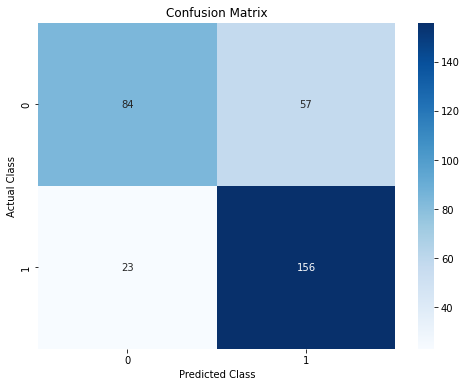

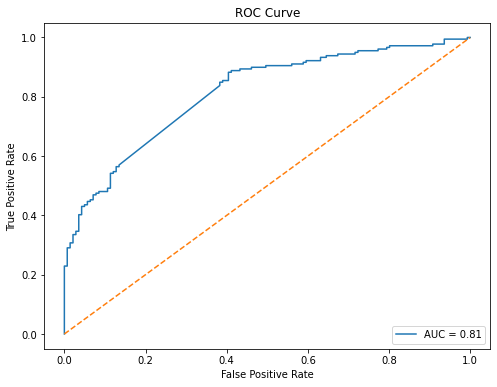

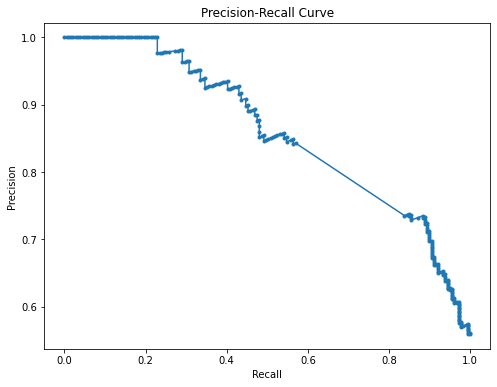

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from models import MLP


# Load Wine Quality Dataset (you can download it from UCI)
df = pd.read_csv("/home/linar/Desktop/ML/Clases/i302/Clases/07_Clase 7: MLPs & Backpropagations/Data/winequality-red.csv")

# Convert into a binary classification problem (e.g. quality <= 5 as class 0, quality > 5 as class 1)
df['quality'] = (df['quality'] > 5).astype(int)

# Prepare dataset
X = df.drop(columns=['quality']).values
y = df['quality'].values.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the MLP
training_data = list(zip(X_train, y_train))
testing_data = list(zip(X_test, y_test))

mlp = MLP(layers=[11, 10, 5, 1], activations=["relu","relu", "sigmoid"], verbose=True)
mlp.fit(training_data, epochs=100, mini_batch_size=64, lr=0.01, val_data=testing_data, verbose=False)

# Predict on test data
predictions = mlp.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, predicted_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, predictions)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Comparamos con sklearn classifier

/home/linar/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/linar/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.62      0.66      0.64       141
           1       0.72      0.69      0.70       179

    accuracy                           0.68       320
   macro avg       0.67      0.67      0.67       320
weighted avg       0.68      0.68      0.68       320



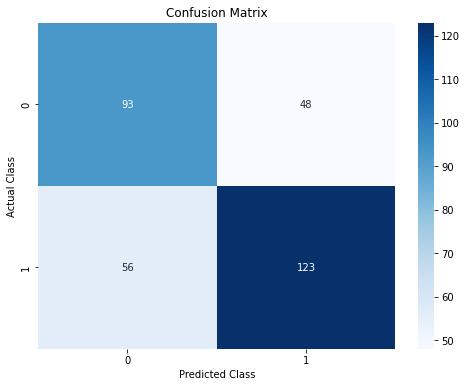

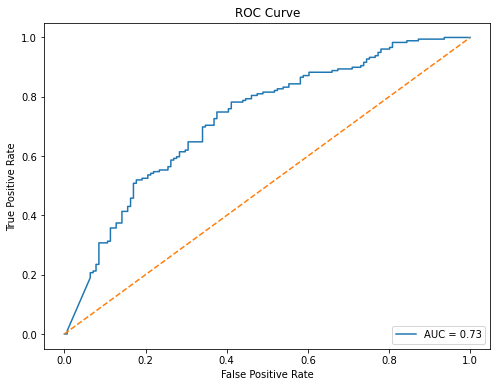

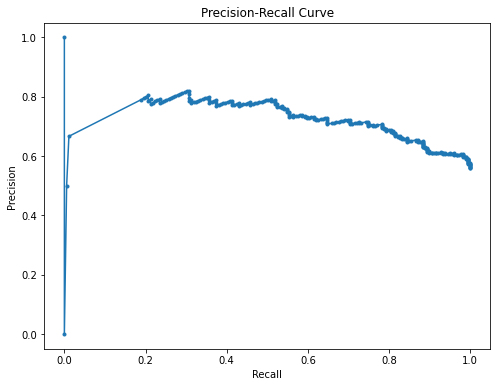

In [15]:
from sklearn.neural_network import MLPClassifier
# Train the MLP using sklearn's MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,5,), activation='relu', solver='sgd', max_iter=100, random_state=42)
mlp.fit(X_train, y_train)

# Predict on test data
predictions = mlp.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
predicted_classes = mlp.predict(X_test)

# Print classification report
print(classification_report(y_test, predicted_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, predictions)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()